In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [3]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [4]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
   print('GPU is Unavailable!')

GPU is Unavailable!


In [5]:

# Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [6]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


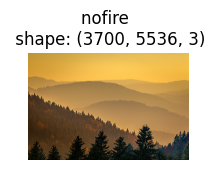

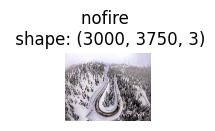

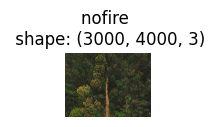

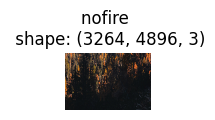

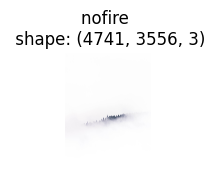

In [8]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
  plt.show()

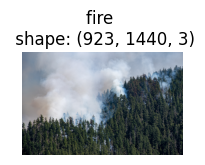

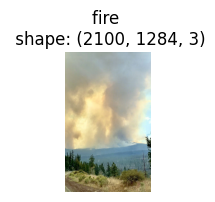

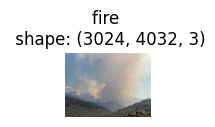

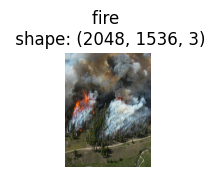

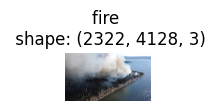

In [9]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
  plt.show()

In [10]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
        target_size = (img_width, img_height),
            batch_size = batch_size,
                class_mode = 'binary',
                    shuffle = True
                    )

val_generator = val_datagen.flow_from_directory(
                     val_dir,
                            target_size = (img_width, img_height),
                                batch_size = batch_size,
                                    class_mode = 'binary',
                                        shuffle = True
                                        )

test_generator = test_datagen.flow_from_directory(
                                            test_dir,
                                               target_size = (img_width, img_height),
                                                    batch_size = batch_size,
                                                        class_mode = 'binary',
                                                            shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [11]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [12]:
# Let's build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
        Conv2D(32, (3,3), activation='relu'),
            MaxPooling2D(pool_size=(2,2)),

                Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),

                        Conv2D(128, (3, 3), activation='relu'),
                            MaxPooling2D(pool_size=(2, 2)),

                                Flatten(),
                                    Dense(512, activation='relu'),
                                        Dropout(0.5),
                                            Dense(1, activation='sigmoid')
                                            ]
                                            )